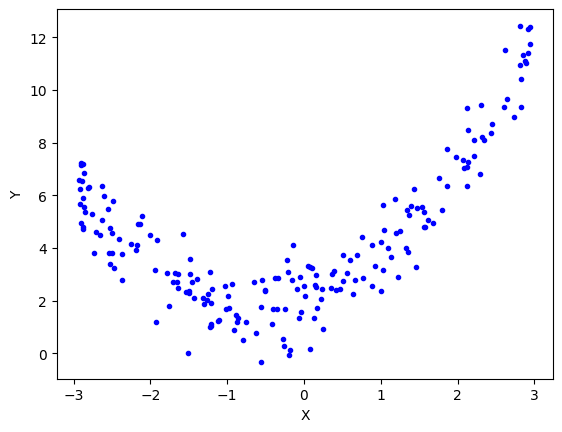

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

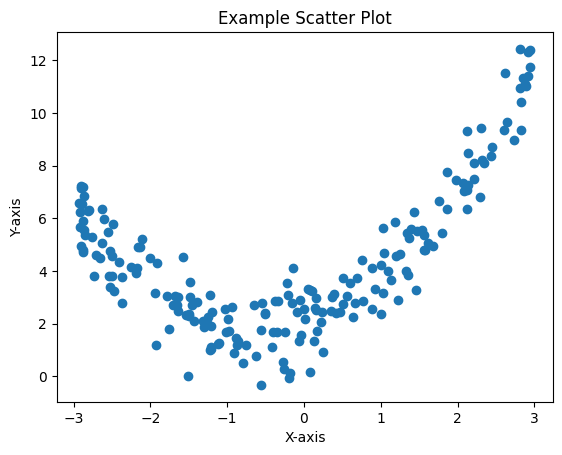

In [ ]:
import csv

# Example data (replace this with your own data or plot)
x_values = X
y_values = y
# Create a scatter plot (example plot)
plt.scatter(x_values, y_values)
plt.title('Example Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Save the plot values (x, y) to a CSV file
data = zip(x_values, y_values)  # Combine x and y values
csv_filename = 'plot_values.csv'

with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['X', 'Y'])  # Write headers
    writer.writerows(data)  # Write the data points

plt.show()  # Show the plot (optional)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
#Read the given CSV file, and view some sample records
birth_rate = pd.read_csv( "birth_rate.csv" )
birth_rate.head()

,X,Y
0,[2.00488632],[8.07986306]
1,[-1.64812493],[0.69143506]
2,[2.96685893],[11.94012558]
3,[1.08645723],[4.61461194]
4,[0.01387424],[1.17003649]


In [ ]:
#split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
#LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.2871277434884122


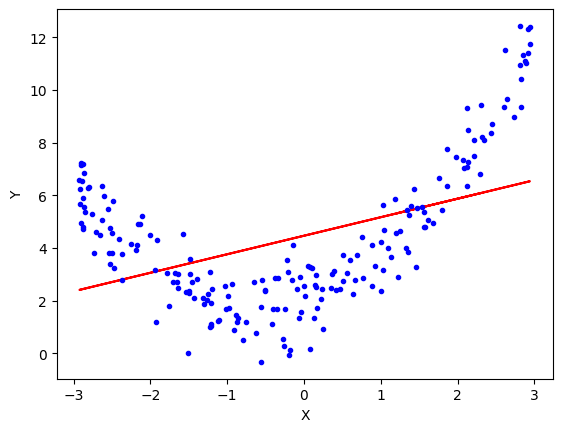

In [ ]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

[[ 1.00000000e+00  2.28606466e+00  5.22609165e+00]
 [ 1.00000000e+00 -1.53044989e+00  2.34227687e+00]
 [ 1.00000000e+00 -2.90560343e+00  8.44253129e+00]
 [ 1.00000000e+00  8.84846017e-01  7.82952473e-01]
 [ 1.00000000e+00  2.91513166e+00  8.49799262e+00]
 [ 1.00000000e+00  2.88308951e+00  8.31220513e+00]
 [ 1.00000000e+00 -1.52968778e-01  2.33994470e-02]
 [ 1.00000000e+00  1.04570735e+00  1.09350385e+00]
 [ 1.00000000e+00 -2.79876587e+00  7.83309040e+00]
 [ 1.00000000e+00  2.44716136e+00  5.98859873e+00]
 [ 1.00000000e+00  1.35014308e+00  1.82288634e+00]
 [ 1.00000000e+00  1.85893628e+00  3.45564409e+00]
 [ 1.00000000e+00 -1.42621353e+00  2.03408504e+00]
 [ 1.00000000e+00 -2.62510924e+00  6.89119855e+00]
 [ 1.00000000e+00 -9.55666278e-02  9.13298035e-03]
 [ 1.00000000e+00 -7.91882283e-01  6.27077550e-01]
 [ 1.00000000e+00 -2.87835100e+00  8.28490446e+00]
 [ 1.00000000e+00 -9.05346575e-01  8.19652422e-01]
 [ 1.00000000e+00 -1.20290447e+00  1.44697916e+00]
 [ 1.00000000e+00 -2.13958366e+

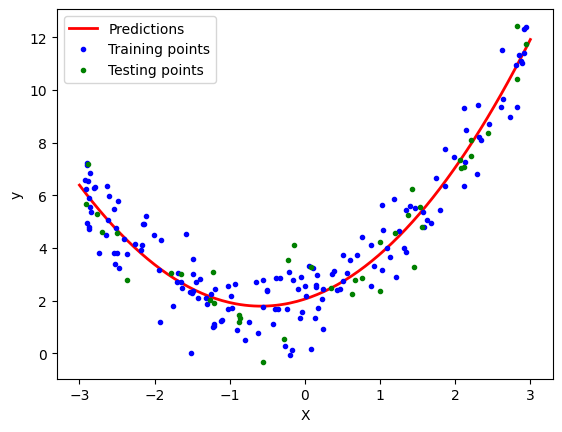

In [ ]:
#polynomial
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
print(x_train_trans)
#model fit
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

#predited line fitting
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.92080216 0.78730788]]
[2.06451739]


Coefficients: [ 0.         -0.15371134  0.0010756 ]
Intercept: 7.960481099656514
R² Score: 0.6732052768464258


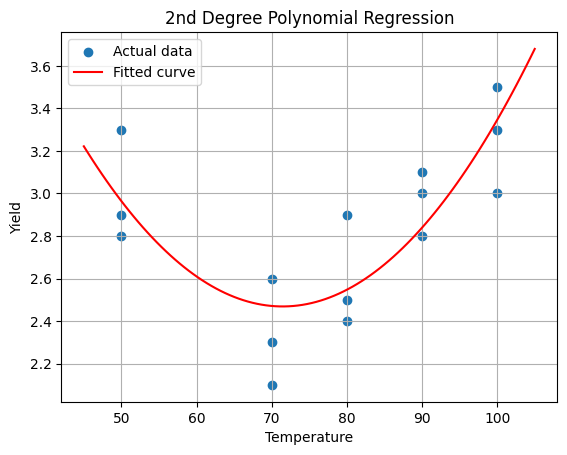

Predicted yield at 95°F: 3.065206185566966


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data
temperature = np.array([50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100]).reshape(-1, 1)
yield_data = np.array([3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0])

# Polynomial regression degree 2
poly = PolynomialFeatures(degree=2)
temperature_poly = poly.fit_transform(temperature)

# Model fitting
lr = LinearRegression()
lr.fit(temperature_poly, yield_data)

# Coefficients of the 2nd degree polynomial equation
coef = lr.coef_
intercept = lr.intercept_
print("Coefficients:", coef)
print("Intercept:", intercept)

# R² score
y_pred = lr.predict(temperature_poly)
r_squared = r2_score(yield_data, y_pred)
print("R² Score:", r_squared)

# Plotting the fitted curve
plt.scatter(temperature, yield_data, label='Actual data')
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('2nd Degree Polynomial Regression')
plt.grid(True)

# Create points for the fitted curve
x_values = np.linspace(45, 105, 100).reshape(-1, 1)
x_values_poly = poly.transform(x_values)
y_values = lr.predict(x_values_poly)

# Plot the fitted curve
plt.plot(x_values, y_values, color='red', label='Fitted curve')
plt.legend()
plt.show()

# Predicting yield at 125 degrees Fahrenheit
x_pred = np.array([[95]])
x_pred_poly = poly.transform(x_pred)
yield_prediction = lr.predict(x_pred_poly)
print("Predicted yield at 95°F:", yield_prediction[0])




In [ ]:

print('MAE: ',mean_absolute_error(yield_data, y_pred))
print('MSE: ', mean_squared_error(yield_data, y_pred)) #loss function
print('RMSE: ', np.sqrt(mean_squared_error(yield_data, y_pred)))

MAE:  0.18593356242841186
MSE:  0.04778465063001149
RMSE:  0.21859700508015084
